In [ ]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split 

import os,glob

In [12]:
project_dir = os.getcwd()
data_dir = os.path.join(project_dir, 'data')

data_csv = pd.read_csv(os.path.join(data_dir, 'train.csv'))
test_csv = pd.read_csv(os.path.join(data_dir, 'test.csv'))

In [14]:
data_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 26 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   id                                  700000 non-null  int64  
 1   age                                 700000 non-null  int64  
 2   alcohol_consumption_per_week        700000 non-null  int64  
 3   physical_activity_minutes_per_week  700000 non-null  int64  
 4   diet_score                          700000 non-null  float64
 5   sleep_hours_per_day                 700000 non-null  float64
 6   screen_time_hours_per_day           700000 non-null  float64
 7   bmi                                 700000 non-null  float64
 8   waist_to_hip_ratio                  700000 non-null  float64
 9   systolic_bp                         700000 non-null  int64  
 10  diastolic_bp                        700000 non-null  int64  
 11  heart_rate                

In [15]:
data_csv['diagnosed_diabetes'].value_counts()

diagnosed_diabetes
1.0    436307
0.0    263693
Name: count, dtype: int64

<Axes: xlabel='cholesterol_total', ylabel='Count'>

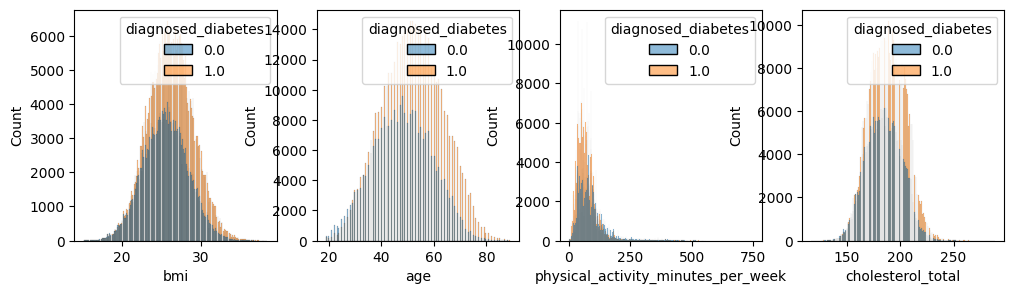

In [75]:
fig, axes = plt.subplots(1,4, figsize=(12, 3))
axes = axes.flatten()
sns.histplot(data = data_csv, x='bmi', hue = 'diagnosed_diabetes', ax=axes[0])
sns.histplot(data = data_csv, x='age', hue = 'diagnosed_diabetes', ax=axes[1])
sns.histplot(data = data_csv, x='physical_activity_minutes_per_week', hue = 'diagnosed_diabetes', ax=axes[2])
sns.histplot(data = data_csv, x='cholesterol_total', hue = 'diagnosed_diabetes', ax=axes[3])



<Axes: >

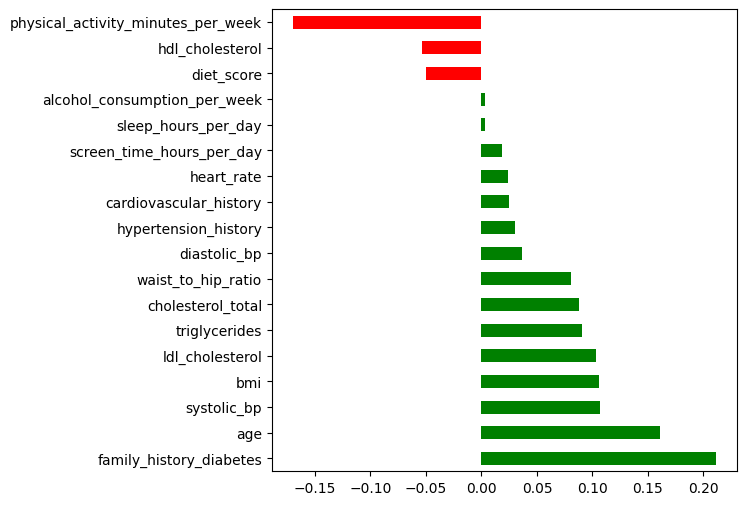

In [76]:
numerical_data = data_csv.select_dtypes(include=['int64', 'float64'])
numerical_data = numerical_data.drop(columns=['id'])

# cholesterol_total = numerical_data['cholesterol_total']
# hdl_cholesterol = numerical_data['hdl_cholesterol']
# numerical_data['cholesterol_ratio'] = cholesterol_total / hdl_cholesterol

# systolic_bp = numerical_data['systolic_bp']
# diastolic_bp = numerical_data['diastolic_bp'] 
# numerical_data['pulse_pressure'] = systolic_bp - diastolic_bp

fig, ax = plt.subplots(figsize=(10, 10))
corr_matrix = numerical_data.corr()
diabetes_corr = corr_matrix['diagnosed_diabetes'].drop('diagnosed_diabetes').sort_values(ascending=False)

colors = ['green' if x > 0 else 'red' for x in diabetes_corr]
diabetes_corr.plot(kind='barh', color=colors, figsize=(6, 6))
#sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [77]:
numerical_data['risk'] = ( 
    (numerical_data['age'] > 45 ).astype(int) + 
    (numerical_data['bmi'] > numerical_data['bmi'].median() ).astype(int) + 
    # (numerical_data['family_history_diabetes'] >0 ).astype(int) + 
    # (numerical_data['systolic_bp'] > numerical_data['systolic_bp'].median()).astype(int) + 
    (numerical_data['physical_activity_minutes_per_week'] < numerical_data['physical_activity_minutes_per_week'].mean() ).astype(int) + 
    (numerical_data['cholesterol_total'] > numerical_data['cholesterol_total'].median()).astype(int) )

numerical_data['risk'].corr(numerical_data['diagnosed_diabetes'])

np.float64(0.18763654746552938)

In [ ]:
for cols in data_csv.columns:
    if data_csv[cols].dtype == 'object':
        print('features: ', cols)
        print(np.unique(data_csv[cols]))
        print('-'*10)

data_csv.describe()

features:  gender
['Female' 'Male' 'Other']
----------
features:  ethnicity
['Asian' 'Black' 'Hispanic' 'Other' 'White']
----------
features:  education_level
['Graduate' 'Highschool' 'No formal' 'Postgraduate']
----------
features:  income_level
['High' 'Low' 'Lower-Middle' 'Middle' 'Upper-Middle']
----------
features:  smoking_status
['Current' 'Former' 'Never']
----------
features:  employment_status
['Employed' 'Retired' 'Student' 'Unemployed']
----------


,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
count,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000
mean,349999.500000,50.359734,2.072411,80.230803,5.963695,7.002200,6.012733,25.874684,0.858766,116.294193,75.440924,70.167749,186.818801,53.823214,102.905854,123.081850,0.149401,0.181990,0.030324,0.623296
std,202072.738554,11.655520,1.048189,51.195071,1.463336,0.901907,2.022707,2.860705,0.037980,11.010390,6.825775,6.938722,16.730832,8.266545,19.022416,24.739397,0.356484,0.385837,0.171478,0.484560
min,0.000000,19.000000,1.000000,1.000000,0.100000,3.100000,0.600000,15.100000,0.680000,91.000000,51.000000,42.000000,117.000000,21.000000,51.000000,31.000000,0.000000,0.000000,0.000000,0.000000
25%,174999.750000,42.000000,1.000000,49.000000,5.000000,6.400000,4.600000,23.900000,0.830000,108.000000,71.000000,65.000000,175.000000,48.000000,89.000000,106.000000,0.000000,0.000000,0.000000,0.000000
50%,349999.500000,50.000000,2.000000,71.000000,6.000000,7.000000,6.000000,25.900000,0.860000,116.000000,75.000000,70.000000,187.000000,54.000000,103.000000,123.000000,0.000000,0.000000,0.000000,1.000000
75%,524999.250000,58.000000,3.000000,96.000000,7.000000,7.600000,7.400000,27.800000,0.880000,124.000000,80.000000,75.000000,199.000000,59.000000,116.000000,139.000000,0.000000,0.000000,0.000000,1.000000
max,699999.000000,89.000000,9.000000,747.000000,9.900000,9.900000,16.500000,38.400000,1.050000,163.000000,104.000000,101.000000,289.000000,90.000000,205.000000,290.000000,1.000000,1.000000,1.000000,1.000000


In [91]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split


inpust_data = data_csv.drop(columns=['diagnosed_diabetes', 'id'])
target_data = data_csv['diagnosed_diabetes']

categorical_cols = data_csv.select_dtypes(include=['object']).columns.tolist()
numerical_cols   = data_csv.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"Categorical columns: {categorical_cols}")
print(f"Numerical columns: {numerical_cols}")

train_data, valid_data, train_target, valid_target = train_test_split(inpust_data, target_data, test_size=0.2, random_state=8964, stratify = target_data)

 
encoder = ColumnTransformer([
    ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
], remainder='passthrough')

train_encoded = encoder.fit_transform(train_data)
valid_encoded = encoder.transform(valid_data)
 

train_encoded

Categorical columns: ['gender', 'ethnicity', 'education_level', 'income_level', 'smoking_status', 'employment_status']
Numerical columns: ['id', 'age', 'alcohol_consumption_per_week', 'physical_activity_minutes_per_week', 'diet_score', 'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi', 'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate', 'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol', 'triglycerides', 'family_history_diabetes', 'hypertension_history', 'cardiovascular_history', 'diagnosed_diabetes']


array([[1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], shape=(560000, 42))

In [90]:
len(data_csv.columns)

26

In [80]:
categorical_cols = data_csv.select_dtypes(include=['object']).columns

In [81]:
categorical_cols

Index(['gender', 'ethnicity', 'education_level', 'income_level',
       'smoking_status', 'employment_status'],
      dtype='object')

In [30]:
unqiue_smoking = np.unique(smoking_data)

for i in unqiue_smoking:
    print(i); print(smoking_encoder.inverse_transform([i]))

0
['Current']
1
['Former']
2
['Never']
